In [2]:
fr_data <- read.csv("FRvideos.csv")
fr_cat_json <- fromJSON("FR_category_id.json")

ERROR: Error in fromJSON("FR_category_id.json"): impossible de trouver la fonction "fromJSON"


In [4]:
fr_category <- as.data.frame(cbind(fr_cat_json[["items"]][["id"]], fr_cat_json[["items"]][["snippet"]][["title"]]))

ERROR: Error in cbind(fr_cat_json[["items"]][["id"]], fr_cat_json[["items"]][["snippet"]][["title"]]): objet 'fr_cat_json' introuvable


In [36]:
names(fr_category) <- c("category_id","category_title")

In [5]:
fr_data <- merge(x = fr_data, y = fr_category, by = "category_id", all = "TRUE")

ERROR: Error in as.data.frame(y): objet 'fr_category' introuvable


In [6]:
fr_data <- fr_data[!(fr_data$video_error_or_removed == "True" || fr_data$comments_disabled == TRUE),]

In [7]:
fr_data <- fr_data[,c("video_id", "trending_date", "title", "channel_title", "category_id", "publish_time", "tags",
                "views", "likes", "dislikes", "comment_count")]

Explanatory variables : 


In [8]:
head(fr_data)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|""merde",212702,29282,1108,3817
Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce, Fabien Olicard, Nad Rich' Hard, Max Bird, Studio Vrac",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161
ceqntSXE-10,17.14.11,DESSINS ANIMEÌS FRANCÌ§AIS VS RUSSES 2 - Daniil le Russe,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokÃ©mon""|""Ã©cole""|""ours""|""Ð¼ÑƒÐ»ÑŒÑ‚Ñ„Ð¸Ð»ÑŒÐ¼",482153,76203,477,9580
WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage d'oreille""|""Humour""|""retro Gaming""|""Joueur du Grenier""|""JDG",925222,85016,550,4303
ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÃ‰LO SKATE ROLLER TROTTINETTE),Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vÃ©lo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""dirt""|""trottinette""|""scoot""|""scooter""|""skate""|""roller""|""trampoline""|""trampoline parc""|""trampoline park""|""big air""|""air bag""|""mousse""|""bac Ã mousse""|""saut""|""tricks""|""dÃ©fi""|""challenge""|""saut en hauteur",141695,8091,72,481
teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens de Stranger Things,"Le Jeu, C'est SÃ©rieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Things""|""Charlie Heaton""|""Natalia Dyer""|""Joe Keery""|""DrÃ´le""|""Humour""|""Blagues nulles""|""Dad Jokes""|""Netflix""|""Demogorgon""|""Onze""|""Eleven""|""Will""|""Joyce""|""Jonathan""|""Nancy""|""Steve""|""Paris Games Week""|""Try Not To Laugh""|""Try Not To Cringe""|""Essaye de ne pas rire""|""JeuSerieux""|""France""|""QuÃ©bec",141253,14354,202,417


Warning message in plot.window(...):
""method" n'est pas un paramètre graphique"Warning message in plot.xy(xy, type, ...):
""method" n'est pas un paramètre graphique"Warning message in title(...):
""method" n'est pas un paramètre graphique"Warning message in plot.window(...):
""method" n'est pas un paramètre graphique"Warning message in plot.xy(xy, type, ...):
""method" n'est pas un paramètre graphique"Warning message in title(...):
""method" n'est pas un paramètre graphique"Warning message in axis(side = side, at = at, labels = labels, ...):
""method" n'est pas un paramètre graphique"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""method" n'est pas un paramètre graphique"Warning message in plot.window(...):
""method" n'est pas un paramètre graphique"Warning message in plot.xy(xy, type, ...):
""method" n'est pas un paramètre graphique"Warning message in title(...):
""method" n'est pas un paramètre graphique"Warning message in plot.xy(xy.coords(x, y), type = type, ...):

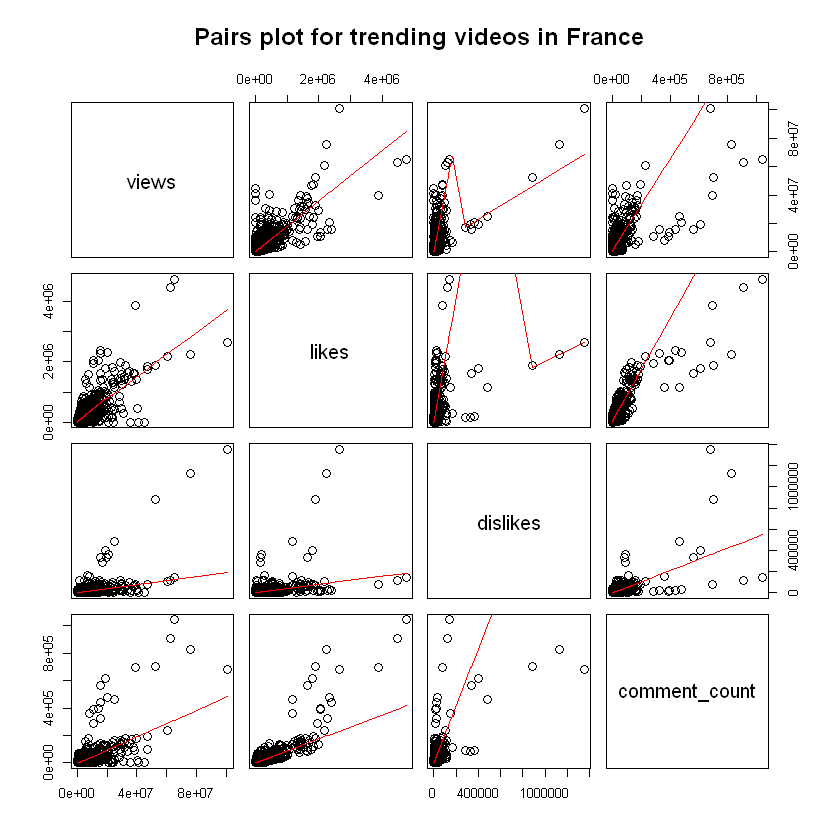

In [9]:
pairs(fr_data[8:11],
      method = "kendall",
      panel = panel.smooth,
      cex = 1.5, pch = 21,
      main = "Pairs plot for trending videos in France")

In [10]:
fr_df <- as.data.frame(sort(table(fr_data$category_title), decreasing = TRUE))
names(fr_df) <- c("category_title","count")

ggplot(fr_df, aes(x = category_title, y = count, fill = factor(category_title))) + geom_bar(stat = "identity") + 
theme(axis.text.x = element_text(angle = 70,hjust = 1), legend.position = "none") + scale_x_discrete(name = "Video 
category ") + scale_y_continuous(name = "Number of videos") + labs(title = "Plot of trending video categories in 
France")

ERROR: Error in names(fr_df) <- c("category_title", "count"): attribut 'names' [2] doit être de même longueur que le vecteur [1]


In [11]:
library('ggplot2')

ERROR: Error in library("ggplot2"): there is no package called 'ggplot2'


In [12]:
install.packages("ggplot2", lib = lib_path)

ERROR: Error in install.packages("ggplot2", lib = lib_path): objet 'lib_path' introuvable


In [13]:
.libPaths()

[1] "C:/Users/remij/Miniconda3/envs/r-kernel/lib/R/library"

In [14]:
lib_path <- 'C:/Users/remij/Miniconda3/envs/r-kernel/lib/R/library'


In [15]:
install.packages("ggplot2", dependencies=TRUE)


also installing the dependencies 'htmltools', 'processx', 'cli', 'xfun', 'bslib', 'tinytex', 'callr', 'pkgload', 'waldo', 'lifecycle', 'rlang', 'scales', 'vctrs', 'knitr', 'rmarkdown', 'testthat', 'vdiffr'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
htmltools 0.5.1.1  0.5.3              TRUE
processx    3.5.2  3.8.0              TRUE
cli         2.5.0  3.4.1              TRUE
xfun         0.22   0.34              TRUE
bslib       0.2.4  0.4.1             FALSE
tinytex      0.31   0.42             FALSE
callr       3.7.0  3.7.3             FALSE
pkgload     1.2.1  1.3.1             FALSE
waldo       0.2.5  0.4.0             FALSE
lifecycle   1.0.0  1.0.3             FALSE
rlang      0.4.11  1.0.6              TRUE
scales      1.1.1  1.2.1             FALSE
vctrs       0.3.8  0.5.0              TRUE
knitr        1.33   1.40             FALSE
rmarkdown     2.8   2.18             FALSE
testthat    3.0.2  3.1.5              TRUE
vdiffr      0.3.3  1.0.4              TRUE
ggplot2     3.3.3  3.4.0             FALSE

  Binaries will be installed
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\remij\Miniconda3\envs\r-kernel\lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll vers C:\Users\remij\Miniconda3\envs\r-kernel\lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'processx' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\remij\Miniconda3\envs\r-kernel\lib\R\library\00LOCK\rlang\libs\x64\rlang.dll vers C:\Users\remij\Miniconda3\envs\r-kernel\lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'vctrs' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\remij\AppData\Local\Temp\RtmpUfWfgT\downloaded_packages


installing the source packages 'bslib', 'tinytex', 'callr', 'pkgload', 'waldo', 'lifecycle', 'scales', 'knitr', 'rmarkdown', 'ggplot2'

Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'bslib' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'pkgload' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'waldo' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2", dependencies = TRUE):
"installation of package 

In [16]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          